In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
uploaded = files.upload()

Saving Sylhet weather data 2023.csv to Sylhet weather data 2023.csv


In [2]:
df = pd.read_csv('Sylhet weather data 2023.csv')
df.head()

,day,tempmax,tempmin,temp,dew,humidity,precip,preciptype,windspeed,winddir,sealevelpressure,cloudcover
0,1,24.6,11.7,17.3,10.2,66.1,0.1,yes,9.0,111.0,1018.8,13.9
1,2,25.3,12.4,17.7,9.8,62.3,0.0,no,9.7,87.6,1018.7,7.3
2,3,25.0,12.1,17.6,9.9,62.9,0.0,no,8.8,82.3,1018.5,5.0
3,4,25.1,12.0,17.4,10.3,65.6,0.0,no,9.4,45.2,1018.0,7.5
4,5,25.7,12.3,18.0,10.6,65.2,0.0,no,10.4,18.1,1018.2,13.5


In [3]:
df.shape

(365, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               365 non-null    int64  
 1   tempmax           365 non-null    float64
 2   tempmin           365 non-null    float64
 3   temp              365 non-null    float64
 4   dew               365 non-null    float64
 5   humidity          365 non-null    float64
 6   precip            365 non-null    float64
 7   preciptype        365 non-null    object 
 8   windspeed         365 non-null    float64
 9   winddir           365 non-null    float64
 10  sealevelpressure  365 non-null    float64
 11  cloudcover        365 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 34.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,365.0,183.000000,105.510663,1.0,92.0,183.0,274.0,365.0
tempmax,365.0,31.319726,3.685813,22.1,28.7,31.3,34.0,39.8
tempmin,365.0,20.282466,4.760964,7.7,16.7,21.1,24.7,27.2
temp,365.0,25.109863,3.846400,15.5,22.2,25.6,28.2,32.4
dew,365.0,18.716438,5.969851,2.6,14.4,19.7,24.6,26.3
humidity,365.0,71.258356,14.784194,34.9,59.9,74.2,82.6,96.6
precip,365.0,6.469315,12.631284,0.0,0.0,0.4,8.0,86.0
windspeed,365.0,12.946027,7.261680,6.1,9.0,10.8,14.6,91.6
winddir,365.0,113.441644,68.192722,11.6,71.7,93.3,135.7,352.1
sealevelpressure,365.0,1009.182740,4.991438,996.5,1004.9,1009.3,1013.3,1018.8


In [6]:
df.isnull().sum()

,0
day,0
tempmax,0
tempmin,0
temp,0
dew,0
humidity,0
precip,0
preciptype,0
windspeed,0
winddir,0


In [7]:
df.columns

Index(['day', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip',
       'preciptype', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover'],
      dtype='object')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


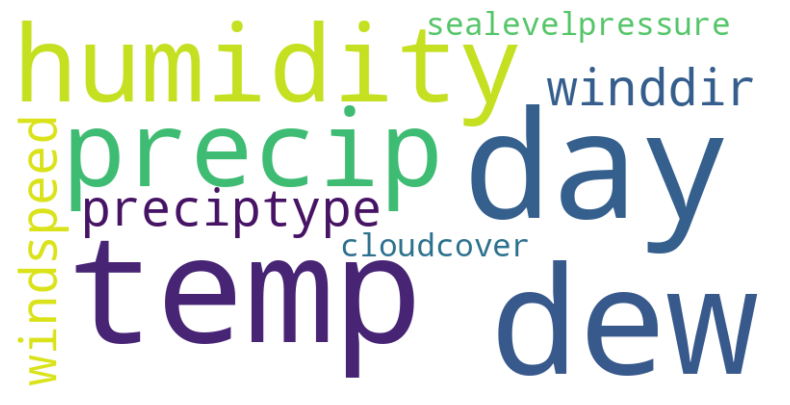

<Figure size 640x480 with 0 Axes>

In [44]:
from wordcloud import WordCloud
from google.colab import drive
drive.mount('/content/drive')
text = ' '.join(df.columns)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()




# Exploratory Data Analysis

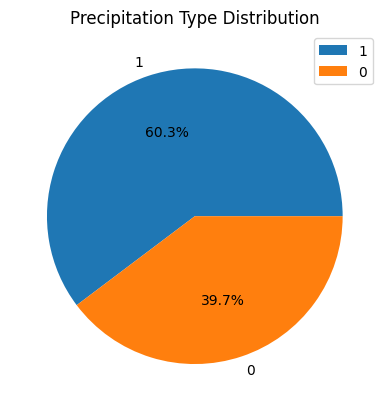

In [41]:

plt.pie(df['preciptype'].value_counts().values,
        labels = df['preciptype'].value_counts().index,
        autopct='%1.1f%%')
plt.legend()
plt.title('Precipitation Type Distribution')
plt.show()

In [10]:
df.groupby('preciptype').mean()

,day,tempmax,tempmin,temp,dew,humidity,precip,windspeed,winddir,sealevelpressure,cloudcover
preciptype,,,,,,,,,,,
no,163.358621,30.379310,16.417241,22.555862,13.199310,59.859310,0.000000,12.795172,110.240000,1013.273103,23.796552
yes,195.945455,31.939545,22.830000,26.793182,22.352727,78.771364,10.733182,13.045455,115.551818,1006.486818,68.733182


In [11]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')
print(features)

['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover']


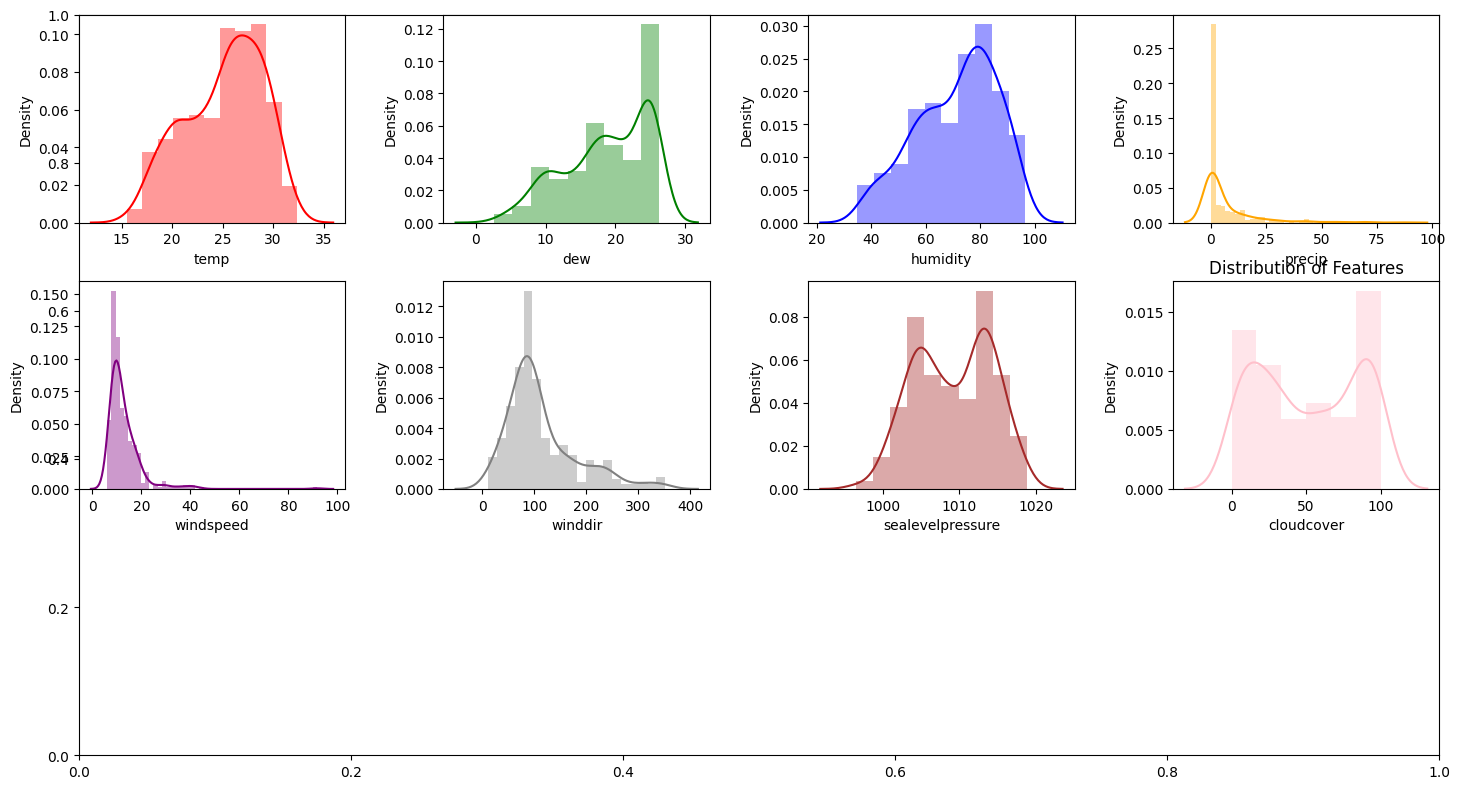

In [45]:
plt.subplots(figsize=(15,8))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow']

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col], color=colors[i % len(colors)])
plt.tight_layout()
plt.title('Distribution of Features')
plt.show()


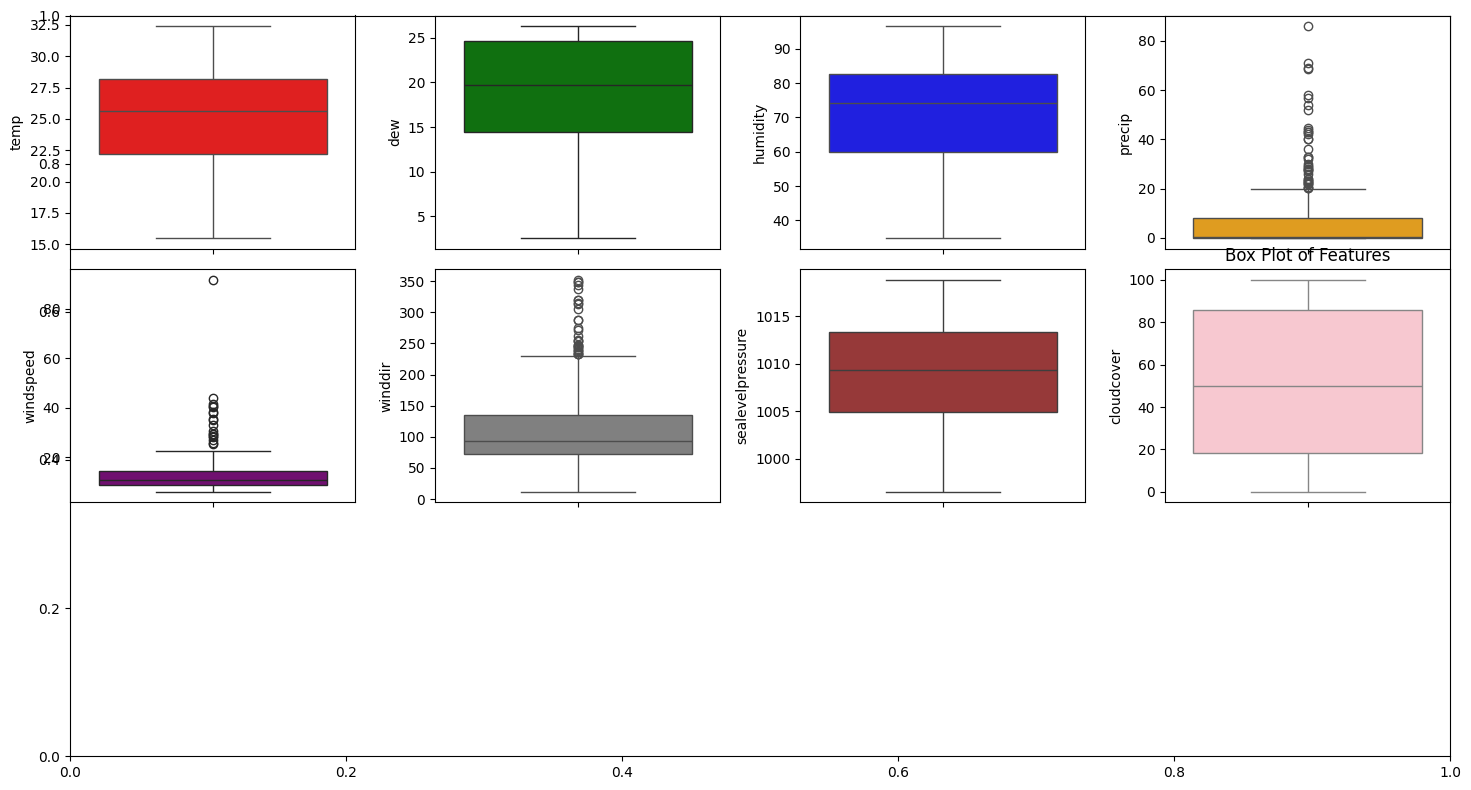

In [46]:
#boxplots for the continuous variable to detect the outliers present in the data.

plt.subplots(figsize=(15,8))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'brown', 'pink', 'olive', 'cyan', 'magenta', 'yellow']

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col], color=colors[i % len(colors)])
plt.tight_layout()
plt.title('Box Plot of Features')
plt.show()

In [15]:
df.replace({'yes':1, 'no':0}, inplace=True)

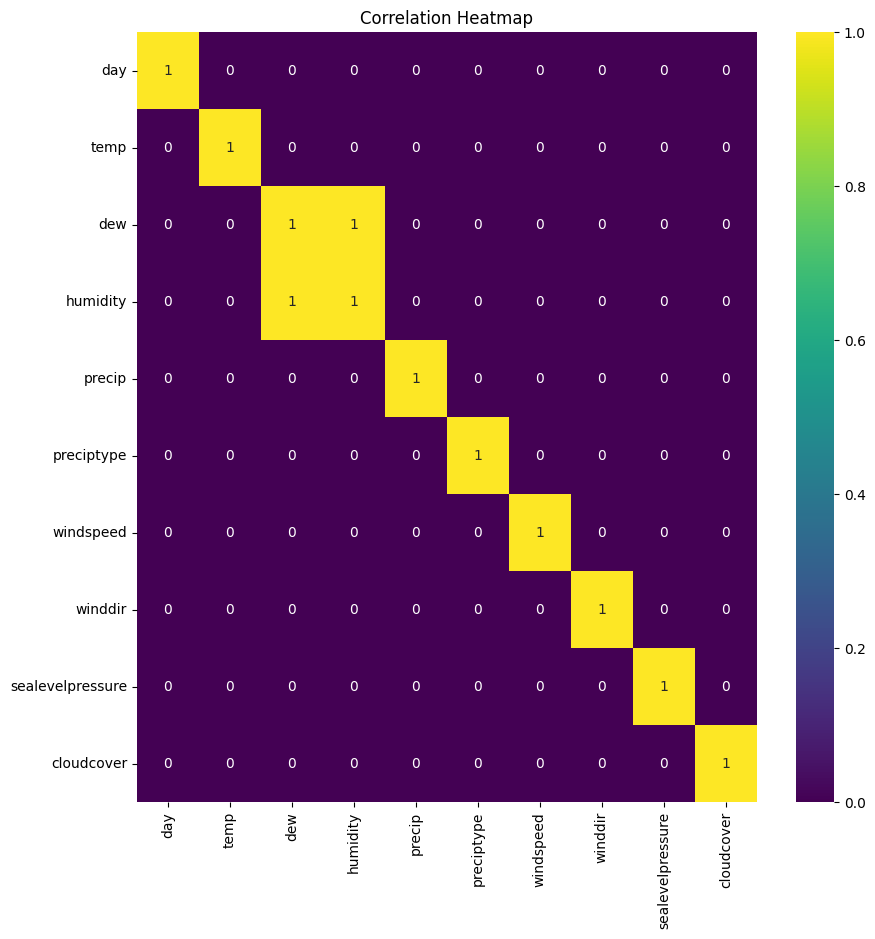

In [47]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cmap='viridis',
           cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.drop(['tempmax', 'tempmin'], axis=1, inplace=True)

# **Model Training**

In [18]:
features = df.drop(['day', 'preciptype'], axis=1)
target = df.preciptype

In [19]:
X_train, X_val, \
    Y_train, Y_val = train_test_split(features,
                                      target,
                                      test_size=0.2,
                                      stratify=target,
                                      random_state=2)

# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train, Y_train)

In [20]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True),
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(random_state=42)
]

for i in range(len(models)):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.9736247417355371
Validation Accuracy :  0.9702194357366771

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  0.9800167871900826
Validation Acc

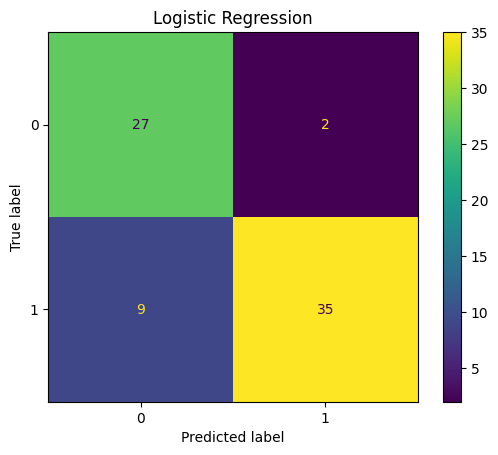

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val, cmap='viridis')
plt.title('Logistic Regression')
plt.show()

In [23]:
print(metrics.classification_report(Y_val,
                                    models[0].predict(X_val)))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.95      0.80      0.86        44

    accuracy                           0.85        73
   macro avg       0.85      0.86      0.85        73
weighted avg       0.87      0.85      0.85        73



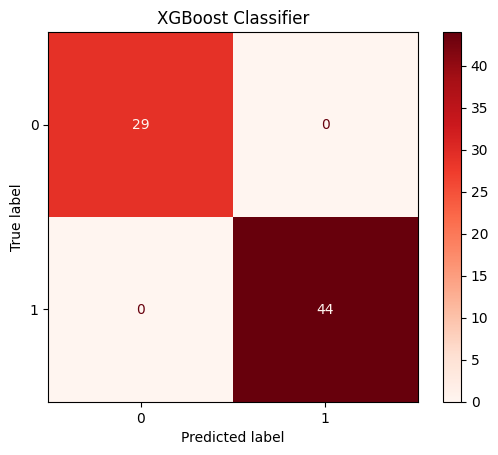

In [49]:
ConfusionMatrixDisplay.from_estimator(models[1], X_val, Y_val,cmap='Reds')
plt.title('XGBoost Classifier')
plt.show()

In [25]:
print(metrics.classification_report(Y_val,
                                    models[1].predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



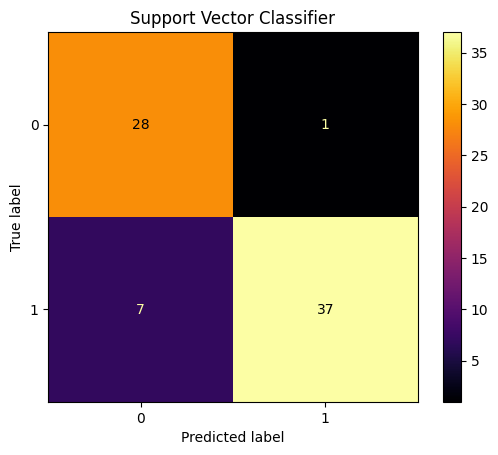

In [50]:
ConfusionMatrixDisplay.from_estimator(models[2], X_val, Y_val,cmap='inferno')
plt.title('Support Vector Classifier')
plt.show()

In [27]:
print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.97      0.84      0.90        44

    accuracy                           0.89        73
   macro avg       0.89      0.90      0.89        73
weighted avg       0.90      0.89      0.89        73



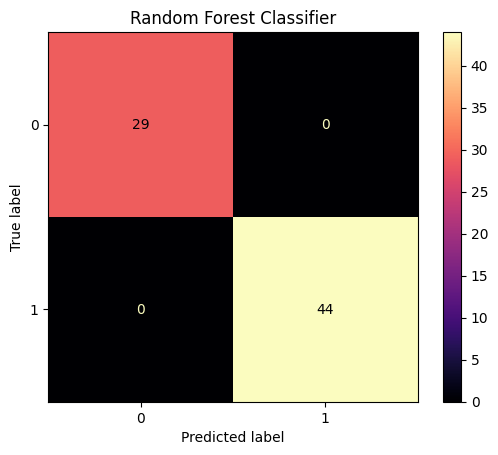

In [52]:
ConfusionMatrixDisplay.from_estimator(models[3], X_val, Y_val, cmap='magma')
plt.title('Random Forest Classifier')
plt.show()

In [28]:
print(metrics.classification_report(Y_val,
                                    models[3].predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



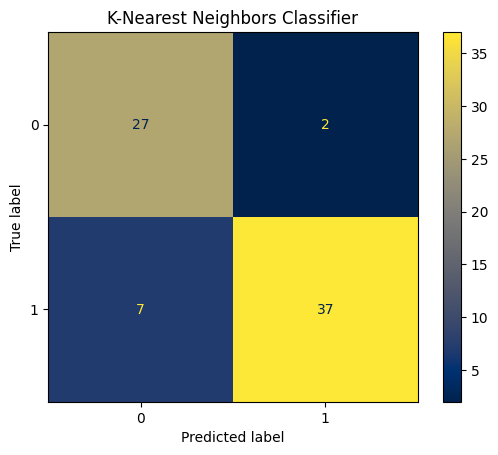

In [53]:
ConfusionMatrixDisplay.from_estimator(models[4], X_val, Y_val, cmap='cividis')
plt.title('K-Nearest Neighbors Classifier')
plt.show()

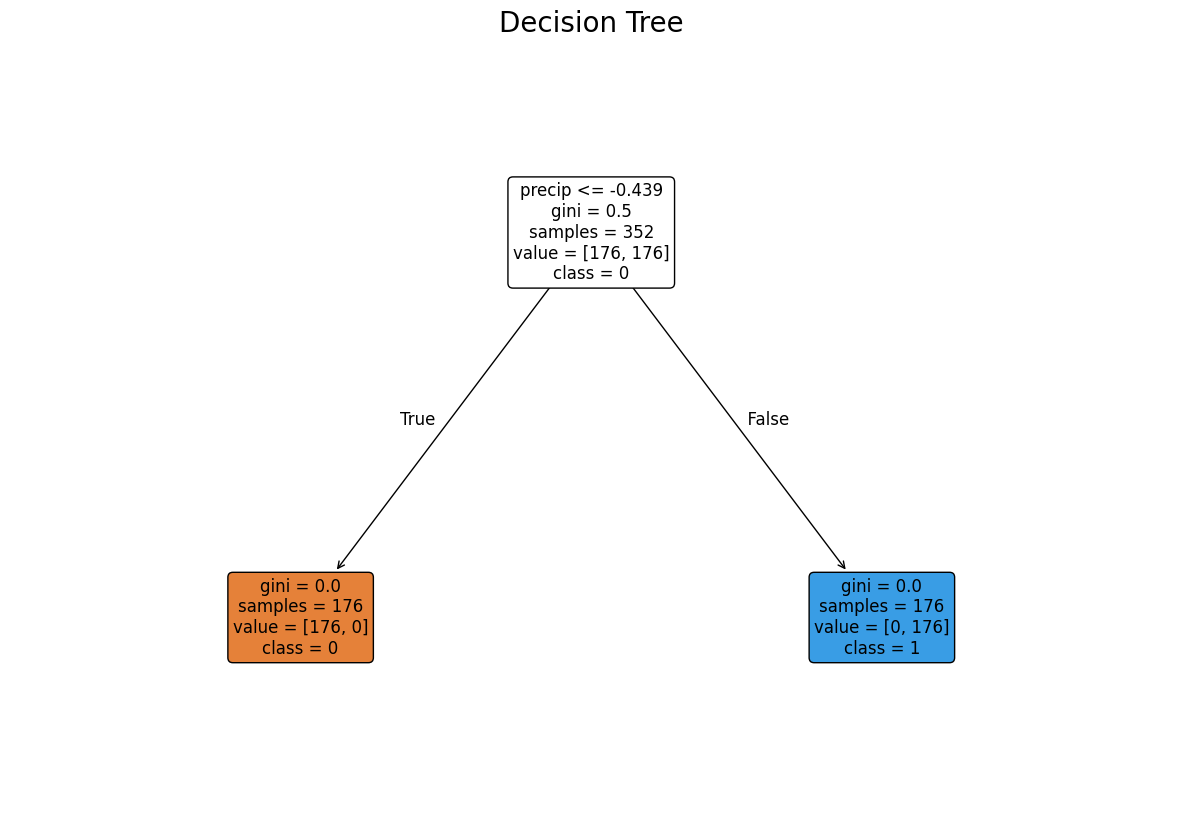

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'models[0]' or similar is your trained Decision Tree
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
plot_tree(models[5],
          feature_names=features.columns,  # Replace with your feature names
          class_names=['0', '1'],  # Replace with your class names if different
          filled=True,
          rounded=True,
          fontsize=12)  # Adjust fontsize for better readability
plt.title("Decision Tree", fontsize=20)
plt.show()

In [30]:
print(metrics.classification_report(Y_val,
                                    models[4].predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.95      0.84      0.89        44

    accuracy                           0.88        73
   macro avg       0.87      0.89      0.87        73
weighted avg       0.89      0.88      0.88        73



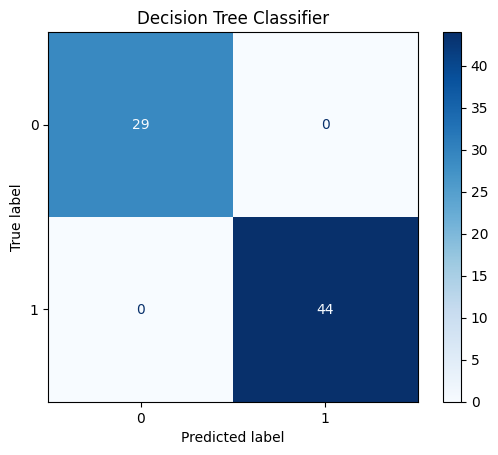

In [62]:
ConfusionMatrixDisplay.from_estimator(models[5], X_val, Y_val, cmap='Blues')
plt.title('Decision Tree Classifier')
plt.show()

In [60]:
print(metrics.classification_report(Y_val,
                                    models[5].predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

